# Keras TF 2.0 - Classification Project Walkthrough

Let's delve into a classification project using the Keras API for TensorFlow 2.0.

## Dataset Overview

### Breast Cancer Wisconsin (Diagnostic) Dataset
-------------------------------------------------------

**Key Dataset Details:**

- Total Instances: 569
- Number of Attributes: 30, encompassing numeric predictive features and the class label.

**Attribute Information:**
- Includes various characteristics such as radius, texture, perimeter, area, smoothness, compactness, concavity, concave points, symmetry, and fractal dimension.
- Features are derived from digitized images of breast mass fine needle aspirates (FNA).
- Each feature comprises the mean, standard error, and "worst" (largest) values, resulting in 30 attributes.

**Class Labels:**
- Two classes: 'WDBC-Malignant' and 'WDBC-Benign'.

**Summary Statistics:**

- Provides min and max values for each attribute.

**Missing Attribute Values:**
- None

**Class Distribution:**
- 212 instances of 'Malignant'
- 357 instances of 'Benign'

**Dataset Origin:**
- Contributed by Dr. William H. Wolberg, W. Nick Street, and Olvi L. Mangasarian
- Donated by Nick Street
- Date: November 1995

This dataset is a replication of the UCI ML Breast Cancer Wisconsin (Diagnostic) dataset.

For more details and access to the dataset, you can visit: [Breast Cancer Wisconsin (Diagnostic) Dataset](https://goo.gl/U2Uwz2).

This dataset comprises features computed from digitized images of breast mass fine needle aspirates (FNA) and is used for characterizing cell nuclei. The separating plane is obtained using Multisurface Method-Tree (MSM-T), a classification method employing linear programming.

The actual linear program utilized for the separating plane in the 3D space is described in the work of K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets" (Optimization Methods and Software, 1992).

References:
- W.N. Street, W.H. Wolberg, and O.L. Mangasarian. "Nuclear Feature Extraction for Breast Tumor Diagnosis." IS&T/SPIE 1993 International Symposium on Electronic Imaging: Science and Technology, 1993.
- O.L. Mangasarian, W.N. Street, and W.H. Wolberg. "Breast Cancer Diagnosis and Prognosis via Linear Programming." Operations Research, 1995.
- W.H. Wolberg, W.N. Street, and O.L. Mangasarian. "Machine Learning Techniques to Diagnose Breast Cancer from Fine-Needle Aspirates." Cancer Letters, 1994.

In [59]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [60]:
df = pd.read_csv('cancer_classification.csv')

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

None of them are null which is good!

In [62]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


## EDA

Let's create a count plot to visualize the distribution of instances across different labels. This will help us assess whether the problem is well-balanced or not.

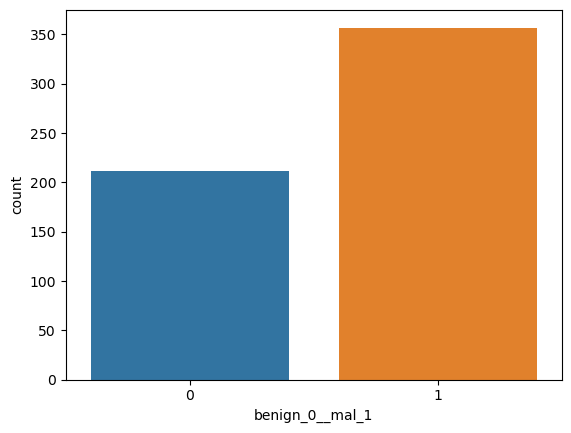

In [63]:
sns.countplot(x='benign_0__mal_1',data=df)
plt.show()

In [64]:
df.corr()['benign_0__mal_1'].sort_values()

worst concave points      -0.793566
worst perimeter           -0.782914
mean concave points       -0.776614
worst radius              -0.776454
mean perimeter            -0.742636
worst area                -0.733825
mean radius               -0.730029
mean area                 -0.708984
mean concavity            -0.696360
worst concavity           -0.659610
mean compactness          -0.596534
worst compactness         -0.590998
radius error              -0.567134
perimeter error           -0.556141
area error                -0.548236
worst texture             -0.456903
worst smoothness          -0.421465
worst symmetry            -0.416294
mean texture              -0.415185
concave points error      -0.408042
mean smoothness           -0.358560
mean symmetry             -0.330499
worst fractal dimension   -0.323872
compactness error         -0.292999
concavity error           -0.253730
fractal dimension error   -0.077972
symmetry error             0.006522
texture error              0

Let's create a plot to enhance visualization.

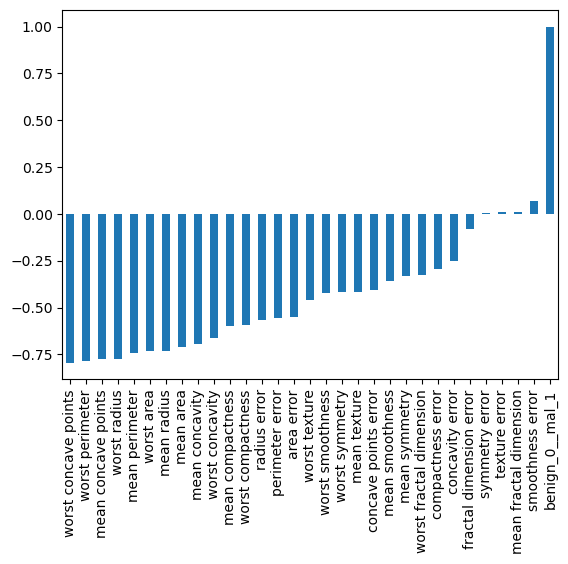

In [65]:
df.corr()['benign_0__mal_1'].sort_values().plot(kind='bar')
plt.show()

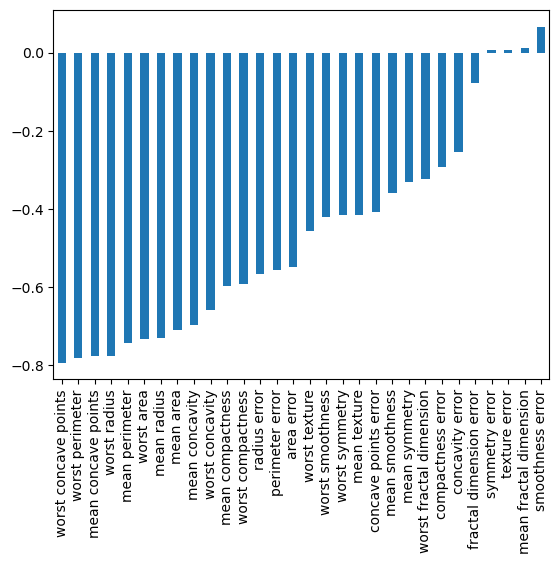

In [66]:
# We should eliminate the values that exhibit self-correlation.
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')
plt.show()

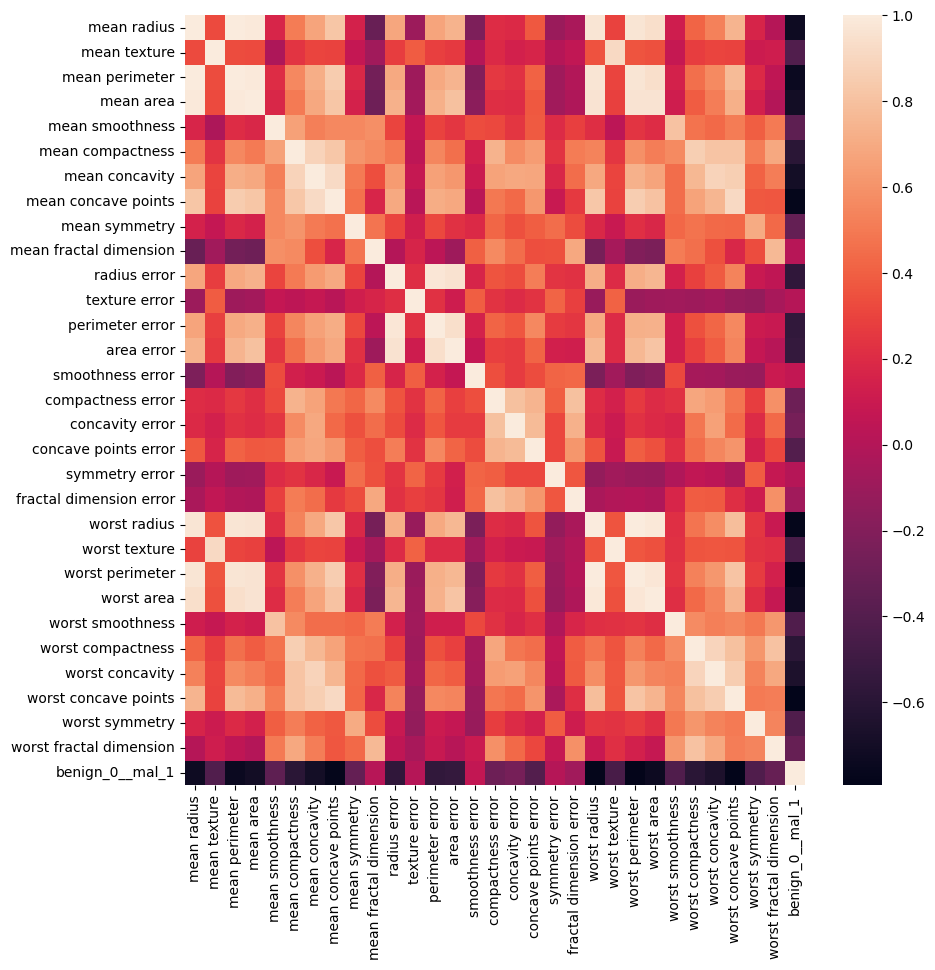

In [67]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr())
plt.show()

## Train Test Split

In [68]:
X = df.drop('benign_0__mal_1',axis=1).values
y = df['benign_0__mal_1'].values

In [69]:
from sklearn.model_selection import train_test_split

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=101)


## Scaling Data

In [71]:
from sklearn.preprocessing import MinMaxScaler

In [72]:
scaler = MinMaxScaler()

In [73]:
scaler.fit(X_train)

MinMaxScaler()

In [74]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Creating the Model

    # For a binary classification problem
    model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
                  
    

In [75]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout

In [76]:
X_train.shape

(426, 30)

In [77]:
model = Sequential() 
#This line initializes a sequential neural network model. A sequential model is a linear stack of layers where you add layers one by one in sequence.

# https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw

model.add(Dense(units=30,activation='relu'))
#This line adds the first hidden layer to the model. It has 30 units (neurons) and uses the Rectified Linear Unit (ReLU) activation function.

model.add(Dense(units=15,activation='relu'))
#This line adds a second hidden layer with 15 units and ReLU activation.


model.add(Dense(units=1,activation='sigmoid'))
# For a binary classification problem
# (This line adds the output layer. It has 1 unit, which is typical for binary classification problems, and uses the sigmoid activation function. 
#Sigmoid activation squashes the output to a range between 0 and 1, which is suitable for binary classification where you want to predict probabilities.)
#
model.compile(loss='binary_crossentropy', optimizer='adam')
# This line compiles the model. It specifies the loss function and optimizer to be used during training.
#loss='binary_crossentropy': This loss function is commonly used for binary classification problems. It measures the difference between predicted and actual values in terms of binary classification.
#optimizer='adam': Adam is an optimization algorithm. It's an efficient and widely used optimizer for training neural networks. It adjusts the model's weights during training to minimize the specified loss.

**Note:**
In machine learning, a loss function (also known as a cost function or objective function) is a mathematical function that quantifies the difference between the predicted values produced by a machine learning model and the actual target values (ground truth). The purpose of a loss function is to measure how well or poorly the model is performing with respect to its predictions, and it serves as the basis for adjusting the model's parameters during the training process.

## Training the Model 

### Example One: Choosing too many epochs and overfitting!

In [78]:
# https://stats.stackexchange.com/questions/164876/tradeoff-batch-size-vs-number-of-iterations-to-train-a-neural-network
# https://datascience.stackexchange.com/questions/18414/are-there-any-rules-for-choosing-the-size-of-a-mini-batch

model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1
          )

Epoch 1/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6786 - val_loss: 0.6401
Epoch 2/600
14/14 [==============================] - 0s 1ms/step - loss: 0.6290 - val_loss: 0.5948
Epoch 3/600
14/14 [==============================] - 0s 1ms/step - loss: 0.5853 - val_loss: 0.5484
Epoch 4/600
14/14 [==============================] - 0s 1ms/step - loss: 0.5378 - val_loss: 0.4990
Epoch 5/600
14/14 [==============================] - 0s 1ms/step - loss: 0.4908 - val_loss: 0.4499
Epoch 6/600
14/14 [==============================] - 0s 1ms/step - loss: 0.4456 - val_loss: 0.4056
Epoch 7/600
14/14 [==============================] - 0s 1ms/step - loss: 0.4041 - val_loss: 0.3631
Epoch 8/600
14/14 [==============================] - 0s 1ms/step - loss: 0.3630 - val_loss: 0.3283
Epoch 9/600
14/14 [==============================] - 0s 1ms/step - loss: 0.3308 - val_loss: 0.2923
Epoch 10/600
14/14 [==============================] - 0s 1ms/step - loss: 0.3036 - val_loss: 0.2677
Epoch 11/

14/14 [==============================] - 0s 1ms/step - loss: 0.0464 - val_loss: 0.0722
Epoch 84/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0471 - val_loss: 0.0745
Epoch 85/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0459 - val_loss: 0.0712
Epoch 86/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0467 - val_loss: 0.0786
Epoch 87/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0460 - val_loss: 0.0763
Epoch 88/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0448 - val_loss: 0.0747
Epoch 89/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0457 - val_loss: 0.0789
Epoch 90/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0455 - val_loss: 0.0749
Epoch 91/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0539 - val_loss: 0.0798
Epoch 92/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0582 - val_loss: 0.0705
Epoch 93/600


14/14 [==============================] - 0s 1ms/step - loss: 0.0323 - val_loss: 0.0810
Epoch 165/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0309 - val_loss: 0.0891
Epoch 166/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0318 - val_loss: 0.0802
Epoch 167/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0316 - val_loss: 0.0879
Epoch 168/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0307 - val_loss: 0.0842
Epoch 169/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0290 - val_loss: 0.0811
Epoch 170/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0291 - val_loss: 0.0863
Epoch 171/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0311 - val_loss: 0.0869
Epoch 172/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0301 - val_loss: 0.0799
Epoch 173/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0281 - val_loss: 0.0979
Epoc

14/14 [==============================] - 0s 1ms/step - loss: 0.0206 - val_loss: 0.0860
Epoch 246/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0189 - val_loss: 0.0959
Epoch 247/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0185 - val_loss: 0.0849
Epoch 248/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0189 - val_loss: 0.1087
Epoch 249/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0196 - val_loss: 0.0857
Epoch 250/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0181 - val_loss: 0.0891
Epoch 251/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0168 - val_loss: 0.0862
Epoch 252/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0172 - val_loss: 0.0857
Epoch 253/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0173 - val_loss: 0.0910
Epoch 254/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0171 - val_loss: 0.0853
Epoc

14/14 [==============================] - 0s 1ms/step - loss: 0.0099 - val_loss: 0.0798
Epoch 327/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0105 - val_loss: 0.0942
Epoch 328/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0098 - val_loss: 0.0867
Epoch 329/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0123 - val_loss: 0.0974
Epoch 330/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0134 - val_loss: 0.0789
Epoch 331/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0162 - val_loss: 0.1041
Epoch 332/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0099 - val_loss: 0.0769
Epoch 333/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0112 - val_loss: 0.0835
Epoch 334/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0101 - val_loss: 0.0889
Epoch 335/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0095 - val_loss: 0.0881
Epoc

14/14 [==============================] - 0s 1ms/step - loss: 0.0060 - val_loss: 0.0973
Epoch 408/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0059 - val_loss: 0.1082
Epoch 409/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0064 - val_loss: 0.0925
Epoch 410/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0072 - val_loss: 0.0980
Epoch 411/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0073 - val_loss: 0.1064
Epoch 412/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0063 - val_loss: 0.0988
Epoch 413/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0058 - val_loss: 0.1042
Epoch 414/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0053 - val_loss: 0.0973
Epoch 415/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0058 - val_loss: 0.1102
Epoch 416/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0059 - val_loss: 0.0918
Epoc

14/14 [==============================] - 0s 1ms/step - loss: 0.0044 - val_loss: 0.1254
Epoch 489/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0070 - val_loss: 0.1359
Epoch 490/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0075 - val_loss: 0.1049
Epoch 491/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0036 - val_loss: 0.1054
Epoch 492/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0035 - val_loss: 0.1189
Epoch 493/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0036 - val_loss: 0.1141
Epoch 494/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0048 - val_loss: 0.1344
Epoch 495/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0035 - val_loss: 0.1095
Epoch 496/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0034 - val_loss: 0.1259
Epoch 497/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0032 - val_loss: 0.1180
Epoc

14/14 [==============================] - 0s 1ms/step - loss: 0.0023 - val_loss: 0.1493
Epoch 570/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0022 - val_loss: 0.1327
Epoch 571/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0037 - val_loss: 0.1720
Epoch 572/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0035 - val_loss: 0.1351
Epoch 573/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0025 - val_loss: 0.1356
Epoch 574/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0020 - val_loss: 0.1356
Epoch 575/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0040 - val_loss: 0.1442
Epoch 576/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0020 - val_loss: 0.1499
Epoch 577/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0017 - val_loss: 0.1535
Epoch 578/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0017 - val_loss: 0.1504
Epoc

In [79]:
model_loss = pd.DataFrame(model.history.history)

In [80]:
# model_loss

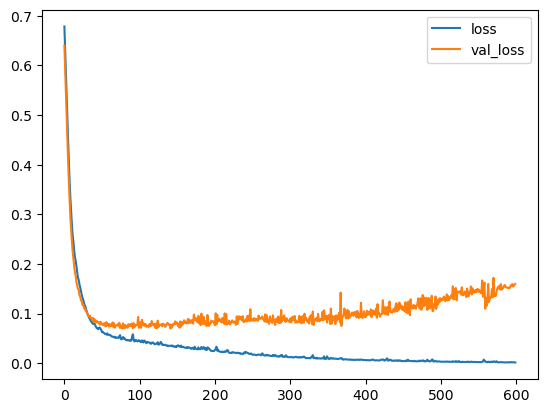

In [81]:
model_loss.plot()
plt.show()

## Example Two: Early Stopping
We obviously trained too much! Let's use early stopping to track the val_loss and stop training once it begins increasing too much!

In [82]:
model = Sequential()
model.add(Dense(units=30,activation='relu'))
model.add(Dense(units=15,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [83]:
from tensorflow.keras.callbacks import EarlyStopping

In [84]:
#help(EarlyStopping)

**Early Stopping** is a practical technique to avoid overfitting and save the best model based on its performance on a validation dataset during training.

It is a technique used during the training of machine learning models, including neural networks. It involves monitoring the model's performance on a validation dataset during training and stopping the training process once the performance stops improving or starts to degrade.

**Key Points:**

- **Validation Monitoring**: Early stopping continuously checks the model's performance on a separate validation dataset.

- **Stopping Criterion**: Training stops when a predefined performance metric (e.g., validation loss or accuracy) no longer improves or begins to worsen.

- **Preventing Overfitting**: It helps prevent overfitting by stopping training when the model's performance on unseen data starts deteriorating.

- **Optimal Model**: The saved model is typically the one with the best performance on the validation set, which is considered the optimal model.

- **Hyperparameter Tuning**: It's useful when tuning hyperparameters to find the right trade-off between model complexity and generalization.

- **Implementation**: Early stopping is often implemented using callbacks in machine learning libraries like Keras, allowing you to specify the metric to monitor and the patience (how many epochs to tolerate without improvement).

Stop training when a monitored quantity has stopped improving.

    Arguments:
        monitor: Quantity to be monitored.
        min_delta: Minimum change in the monitored quantity
            to qualify as an improvement, i.e. an absolute
            change of less than min_delta, will count as no
            improvement.
        patience: Number of epochs with no improvement
            after which training will be stopped.
        verbose: verbosity mode.
        mode: One of `{"auto", "min", "max"}`. In `min` mode,
            training will stop when the quantity
            monitored has stopped decreasing; in `max`
            mode it will stop when the quantity
            monitored has stopped increasing; in `auto`
            mode, the direction is automatically inferred
            from the name of the monitored quantity.


In [85]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [86]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6834 - val_loss: 0.6645
Epoch 2/600
14/14 [==============================] - 0s 1ms/step - loss: 0.6556 - val_loss: 0.6393
Epoch 3/600
14/14 [==============================] - 0s 1ms/step - loss: 0.6297 - val_loss: 0.6119
Epoch 4/600
14/14 [==============================] - 0s 1ms/step - loss: 0.6020 - val_loss: 0.5810
Epoch 5/600
14/14 [==============================] - 0s 1ms/step - loss: 0.5712 - val_loss: 0.5482
Epoch 6/600
14/14 [==============================] - 0s 1ms/step - loss: 0.5380 - val_loss: 0.5113
Epoch 7/600
14/14 [==============================] - 0s 1ms/step - loss: 0.5004 - val_loss: 0.4705
Epoch 8/600
14/14 [==============================] - 0s 1ms/step - loss: 0.4599 - val_loss: 0.4243
Epoch 9/600
14/14 [==============================] - 0s 1ms/step - loss: 0.4146 - val_loss: 0.3768
Epoch 10/600
14/14 [==============================] - 0s 1ms/step - loss: 0.3720 - val_loss: 0.3364
Epoch 11/

14/14 [==============================] - 0s 1ms/step - loss: 0.0539 - val_loss: 0.1142
Epoch 84/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0538 - val_loss: 0.1104
Epoch 85/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0543 - val_loss: 0.1114
Epoch 86/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0538 - val_loss: 0.1180
Epoch 87/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0530 - val_loss: 0.1117
Epoch 88/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0547 - val_loss: 0.1112
Epoch 89/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0531 - val_loss: 0.1175
Epoch 90/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0519 - val_loss: 0.1088
Epoch 91/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0526 - val_loss: 0.1177
Epoch 92/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0520 - val_loss: 0.1157
Epoch 93/600


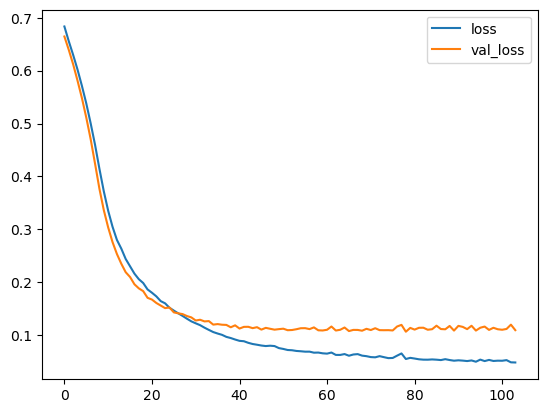

In [87]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()
plt.show()

## Example Three: Adding in DropOut Layers
We can mitigate the issue of overfitting by incorporating a dropout mechanism into the model.

**Dropout** is a regularization technique that introduces randomness by deactivating neurons during training, reducing the risk of overfitting and improving a model's generalization performance.

It is a regularization technique used in neural networks to prevent overfitting. It works by randomly deactivating a fraction of neurons (input units) during each training iteration. This encourages the network to become more robust and less reliant on specific neurons, reducing the risk of overfitting.

**Key Points:**

- **Random Deactivation**: During training, a fraction of neurons is randomly set to zero in each forward and backward pass.

- **Fraction (Dropout Rate)**: The fraction of neurons to deactivate is determined by a user-defined dropout rate (e.g., 0.5 for 50%, which means that during training, approximately 50% of the neurons in the previous layer (the one before the dropout layer) will be randomly "dropped out" or deactivated during each training iteration).

- **Reduces Overfitting**: Dropout prevents the network from memorizing the training data, making it generalize better to unseen data.

- **Ensemble Effect**: It approximates the training of many subnetworks and has an ensemble effect, which improves performance.

- **Common Usage**: Widely used in deep learning for various neural network architectures.

In [88]:
from tensorflow.keras.layers import Dropout

In [89]:
model = Sequential()
model.add(Dense(units=30,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=15,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [90]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/600
14/14 [==============================] - 0s 4ms/step - loss: 0.7081 - val_loss: 0.6829
Epoch 2/600
14/14 [==============================] - 0s 1ms/step - loss: 0.6811 - val_loss: 0.6664
Epoch 3/600
14/14 [==============================] - 0s 1ms/step - loss: 0.6767 - val_loss: 0.6483
Epoch 4/600
14/14 [==============================] - 0s 1ms/step - loss: 0.6515 - val_loss: 0.6309
Epoch 5/600
14/14 [==============================] - 0s 1ms/step - loss: 0.6480 - val_loss: 0.6106
Epoch 6/600
14/14 [==============================] - 0s 1ms/step - loss: 0.6152 - val_loss: 0.5902
Epoch 7/600
14/14 [==============================] - 0s 1ms/step - loss: 0.6001 - val_loss: 0.5669
Epoch 8/600
14/14 [==============================] - 0s 1ms/step - loss: 0.5867 - val_loss: 0.5451
Epoch 9/600
14/14 [==============================] - 0s 1ms/step - loss: 0.5714 - val_loss: 0.5167
Epoch 10/600
14/14 [==============================] - 0s 1ms/step - loss: 0.5482 - val_loss: 0.4907
Epoch 11/

14/14 [==============================] - 0s 1ms/step - loss: 0.1503 - val_loss: 0.0995
Epoch 84/600
14/14 [==============================] - 0s 1ms/step - loss: 0.1048 - val_loss: 0.1016
Epoch 85/600
14/14 [==============================] - 0s 1ms/step - loss: 0.1525 - val_loss: 0.1028
Epoch 86/600
14/14 [==============================] - 0s 1ms/step - loss: 0.1191 - val_loss: 0.0993
Epoch 87/600
14/14 [==============================] - 0s 1ms/step - loss: 0.1263 - val_loss: 0.1006
Epoch 88/600
14/14 [==============================] - 0s 1ms/step - loss: 0.1209 - val_loss: 0.1010
Epoch 89/600
14/14 [==============================] - 0s 1ms/step - loss: 0.1233 - val_loss: 0.1026
Epoch 90/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0923 - val_loss: 0.0981
Epoch 91/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0995 - val_loss: 0.1038
Epoch 92/600
14/14 [==============================] - 0s 1ms/step - loss: 0.1145 - val_loss: 0.1108
Epoch 93/600


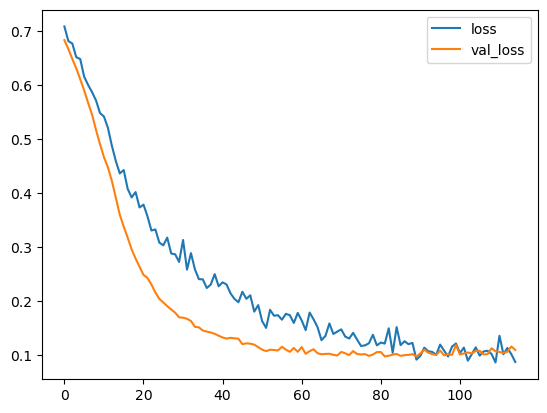

In [91]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()
plt.show()

This is much improved!

# Model Evaluation

In [93]:
# Get predicted probabilities
predicted_probabilities = model.predict(X_test)

# Convert probabilities to class labels
predictions = (predicted_probabilities > 0.5).astype(int)


5/5 [==============================] - 0s 588us/step


In [94]:
from sklearn.metrics import classification_report,confusion_matrix

In [95]:
# https://en.wikipedia.org/wiki/Precision_and_recall
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        55
           1       0.99      0.98      0.98        88

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



In [96]:
print(confusion_matrix(y_test,predictions))

[[54  1]
 [ 2 86]]
